In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFramerame

In [7]:
titanic_df = pd.read_csv("train.csv")  #Reading and storing our dataset

titanic_df.head()  #Show

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p>Let's begin our data analysis project with trying to answer some questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our new data analysis skills!</p>
<p>First some basic questions:</p>

<pre><code>1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2.) What deck were the passengers on and how does that relate to their class?
3.) Where did the passengers come from?
4.) Who was alone and who was with family?

</code></pre>
<p>Then we'll dig deeper, with a broader question:</p>

<pre><code>5.) What factors helped someone survive the sinking?</code></pre>

</div>
</div>

In [6]:
#Let's import some visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

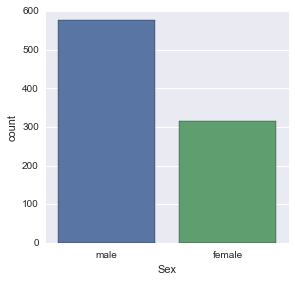

In [11]:
# Let's first check gender
sns.factorplot('Sex',data=titanic_df, kind="count")

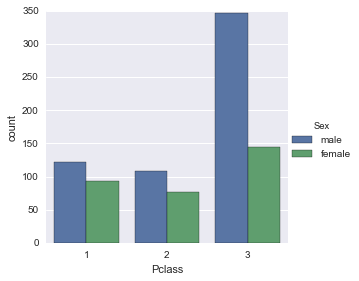

In [15]:
#Now let's separate the gender by classes

sns.factorplot('Pclass', data=titanic_df, hue='Sex', kind='count')

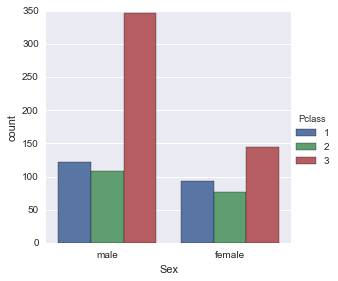

In [16]:
sns.factorplot('Sex', data=titanic_df, hue='Pclass', kind='count')

Wow, quite a few more males in the 3rd class than females, an interesting find. However, it might be useful to know the split between males,females,and children. How can we go about this?

In [17]:
#let's define a function to find childrens

def male_female_child(passenger):
    age,sex = passenger
    if age < 16 :
        return "child"
    else:
        return sex
    

In [19]:
#Now we will use combine and apply method

titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [20]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


Now we have a new column called person which contains list of child also, and there is a famous saying child and womens first.

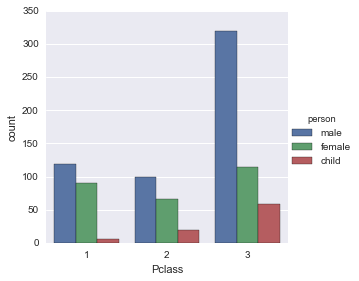

In [22]:
#Now I will check how many children are there in each class

sns.factorplot('Pclass', data=titanic_df, hue='person', kind='count')

It's little bit intersting that quite a more child in class 3 but not much in class 1. <br/>
How about create a histogram to get more precise view

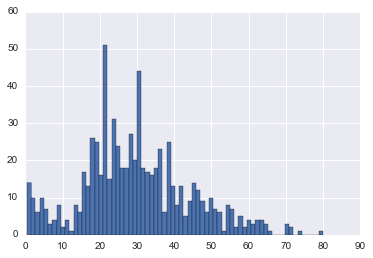

In [23]:
titanic_df['Age'].hist(bins=70)

In [24]:
titanic_df['Age'].mean()

29.69911764705882

In [25]:
# We could also get a quick overall comparison of male,female,child
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64